In [28]:
#folder = '\\BoidTest\\ES - Results\\'
#folder = 'boidEvolution\\ES - Results\\'
folder = ''
prefix = "Run "
numRuns = 3
runs = [i+1 for i in range(numRuns)]
#runs = [1]
datatypes = ['predator', 'prey']
#runs = [1]
#datatypes = ['predator']
postfix = 'ESBoidRuns.txt'

In [29]:
print(runs)

[1]


In [30]:
import os
print(os.getcwd())

C:\Users\arthu\OneDrive - University of Georgia\Documents\GitHub


In [31]:
def getData(fileStr):
    dbs = {}
    lines = fileStr.split('\n')
    lst = []
    lstName = ''
    named = False
    numTrials = 5.0
    for line in lines:
        lineStr = line.split('\t')
        #print(lineStr)
        if len(lineStr[0]) > 0 : 
            if not lineStr[0].isnumeric():
                if not named:
                    named = True
                else:
                    if type(lst[0]) == type({}):
                        fitLst = []
                        genLst = []
                        sepLst = []
                        alignLst = []
                        coheLst = []
                        acuitLst = []
                        for genome in lst:
                            fitLst.append(genome['fitness'])
                            genLst.append(genome['genome'])
                            sepLst.append(genome['genome'][0])
                            alignLst.append(genome['genome'][1])
                            coheLst.append(genome['genome'][2])
                            acuitLst.append(genome['genome'][3])
                        dbs[lstName] = {'fitness': fitLst,\
                                       'genome': genLst,\
                                       'separation': sepLst,\
                                        'alignment': alignLst,\
                                        'cohesion': coheLst,\
                                        'acuity': acuitLst
                                       }
                        lst = []
                    else:
                        #if lstName == 'AVG FITNESS':
                        #apparently offspring fitness was calculated differently
                        if lstName != 'OFFSPRING FITNESS':
                            for i in range(len(lst)):
                                lst[i] = float(lst[i]/numTrials)
                        dbs[lstName] = lst
                        lst = []

                lstName = lineStr[2]
            else:
                if not lineStr[2].replace('.', '').isnumeric():
                    genome = genomeDB(lineStr[2])
                    lst.append(genome)
                else:
                    lst.append(float(lineStr[2]))
    dbs[lstName] = lst
    return dbs

In [32]:
import re
def genomeDB(gene):
    db = {}
    reg = 'fitness: (.*), genome: \[(.*)\]'
    regex = re.compile(reg)
    received = regex.search(gene) 
    db['fitness'] = float(received[1])
    genome_lst = received[2].split(',')
    db['genome'] = [float(genome_lst[i]) for i in range(len(genome_lst))]
    db['genome'][3] = round(db['genome'][3], 2)
    return db

In [33]:
#{'fitness': 297.0, 'genome': [4.37, 1.62, 1.49, 3.27], 'sigma': 1.4043}

In [34]:
dbs = {}
for datatype in datatypes:
    dbs[datatype] = {}
    for runNum in runs:
        file = folder + prefix + str(runNum) + ' ' + datatype + postfix
        s = ''
        with open(file, 'r') as f:
            for line in f:
                s += line
        fileDbs = getData(s)
        dbs[datatype][runNum] = fileDbs
#print(dbs)

In [37]:
print(dbs['predator'][1]['BEST INDIVIDUAL']['alignment'])

[1.83, 1.81, 1.83, 1.83, 1.83, 1.83, 1.83, 1.83, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.01, 1.01, 1.0, 1.0, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [86]:
dbs_name = 'ES_data_genomes.json'

In [88]:
import pandas as pd
import json
with open(folder + dbs_name, 'w', encoding = 'utf-8') as f:
    json.dump(dbs, f, ensure_ascii=False)

In [87]:
with open(dbs_name, 'r', encoding = 'utf-8') as f:
    ES_data = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'ES_data_genomes.json'

In [198]:
#print(dbs['prey'])

In [216]:
testdb = {'blah': [1, 2, 3], 'foo': [2, 3, 4]}
print(testdb['blah'])

[1, 2, 3]


[]

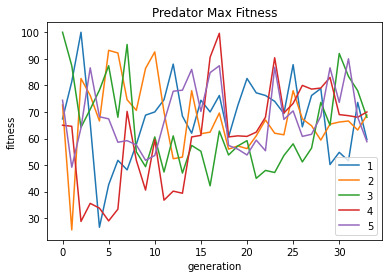

In [99]:
import matplotlib.pyplot as plt
#plt.set_xlabel = 'generation'
#plt.set_ylabel('fitness')# = 'fitness'
for num in range(1, 6):
    plt.plot(dbs['predator'][num]['MAX FITNESS'][1:], label = num)
plt.ylabel('fitness')
plt.xlabel('generation')
plt.title("Predator Max Fitness")
plt.legend()
plt.plot()

[]

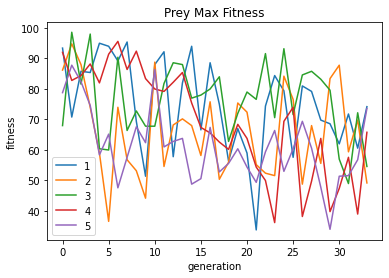

In [100]:
import matplotlib.pyplot as plt
#plt.set_xlabel = 'generation'
#plt.set_ylabel('fitness')# = 'fitness'
for num in range(1, 6):
    plt.plot(dbs['prey'][num]['MAX FITNESS'][1:], label = num)
plt.ylabel('fitness')
plt.xlabel('generation')
plt.title("Prey Max Fitness")
plt.legend()
plt.plot()

[]

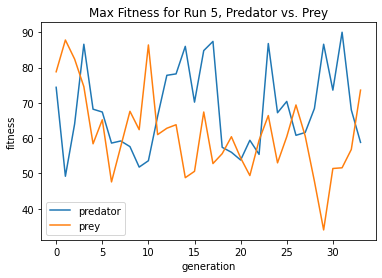

In [77]:
import matplotlib.pyplot as plt
#plt.set_xlabel = 'generation'
#plt.set_ylabel('fitness')# = 'fitness'
num=5
plt.plot(dbs['predator'][num]['MAX FITNESS'][1:], label = 'predator')
plt.plot(dbs['prey'][num]['MAX FITNESS'][1:], label = 'prey')
#for num in range(1, 6):
#    plt.plot(dbs['predator'][num]['MAX FITNESS'][1:], label = num)
plt.ylabel('fitness')
plt.xlabel('generation')
plt.title(f"Max Fitness for Run {num}, Predator vs. Prey")
plt.legend()
plt.plot()

[]

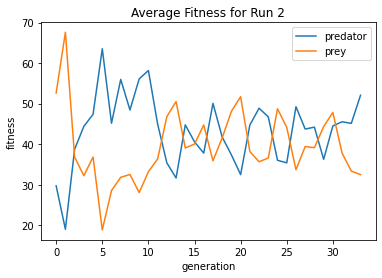

In [78]:
import matplotlib.pyplot as plt
#plt.set_xlabel = 'generation'
#plt.set_ylabel('fitness')# = 'fitness'
num=2
plt.plot(dbs['predator'][num]['AVG FITNESS'][1:], label = 'predator')
plt.plot(dbs['prey'][num]['AVG FITNESS'][1:], label = 'prey')
plt.ylabel('fitness')
plt.xlabel('generation')
plt.title(f"Average Fitness for Run {num}")
plt.legend()
plt.plot()

[]

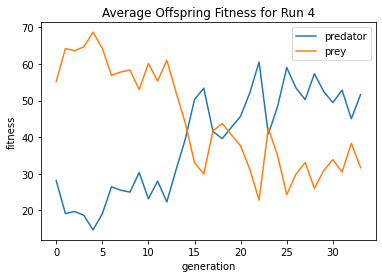

In [94]:
import matplotlib.pyplot as plt
#plt.set_xlabel = 'generation'
#plt.set_ylabel('fitness')# = 'fitness'
num = 4
plt.plot(dbs['predator'][num]['AVG OFFSPRING FITNESS'][1:], label = 'predator')
plt.plot(dbs['prey'][num]['AVG OFFSPRING FITNESS'][1:], label = 'prey')
plt.ylabel('fitness')
plt.xlabel('generation')
plt.title(f"Average Offspring Fitness for Run {num}")
plt.legend()
plt.plot()

[]

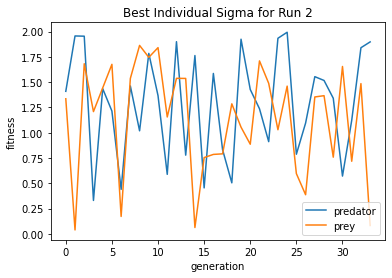

In [80]:
import matplotlib.pyplot as plt
#plt.set_xlabel = 'generation'
#plt.set_ylabel('fitness')# = 'fitness'
num = 2
plt.plot(dbs['predator'][num]['BEST INDIVIDUAL']['separation'][1:], label = 'predator')
plt.plot(dbs['prey'][num]['BEST INDIVIDUAL']['separation'][1:], label = 'prey')
plt.ylabel('fitness')
plt.xlabel('generation')
plt.title(f"Best Individual Sigma for Run {num}")
plt.legend()
plt.plot()

In [ ]:
import matplotlib.pyplot as plt
#plt.set_xlabel = 'generation'
#plt.set_ylabel('fitness')# = 'fitness'
num = 2
plt.plot(dbs['predator'][num]['BEST INDIVIDUAL']['alignment'][1:], label = 'predator')
plt.plot(dbs['prey'][num]['BEST INDIVIDUAL']['alignment'][1:], label = 'prey')
plt.ylabel('fitness')
plt.xlabel('generation')
plt.title(f"Best Individual Sigma for Run {num}")
plt.legend()
plt.plot()

In [224]:
#dbs['predator'][num]['BEST INDIVIDUAL']

In [105]:
tbs = getData(s)
#print(tbs)

In [74]:
print('1.452'.replace('.', '').isnumeric())

True


In [21]:
import math

#print(math.pi)

PI = math.pi
E = math.e

DIMENSION = 4

genome = [1.9, 1.9, 1.9, 1.9]
genome = []
genome = [2, 2, 4, 2]
#genome = [1.5, 1.5, 1.5, 1.5]
sum1 = 0
sum2 = 0

for i in range(4):
    sum1 += (genome[i] -2)* (genome[i] -2)
    sum2 += math.cos(2.0 * PI * (genome[i] -2))
    sum1 = -0.2 * math.sqrt(sum1 / DIMENSION)
    sum2 /= DIMENSION
ack =  -20.0 * math.exp(sum1) - math.exp(sum2) + 20.0 + E;

print(ack)


# for (int i = 0; i < DIMENSION; i++) { sum1 += (genome[i] -2)* (genome[i] -2); sum2 += Math.cos(2.0 * PI * (genome[i] -2)); }
# 		sum1 = -0.2 * Math.sqrt(sum1 / (double)DIMENSION); sum2 /= (double)DIMENSION;
		
# 		if (!printed){
# 			System.out.println("Using ackley function - be warned");
# 			printed = true;
# 			}
		
# 		return -20.0 * Math.exp(sum1) - Math.exp(sum2) + 20.0 + E;

ValueError: math domain error

In [5]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
from sklearn import tree
from  sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


excl_list = []

for file in excl_list:
    excl_list.append

In [6]:
old_state_file = 'United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv'
old_df_counties = pd.read_csv(old_state_file)
#print(old_df_counties)

In [1]:
folder = 'kaggle_archive'
state_file = 'us_states_covid19_daily.csv'
df_state = pd.read_csv(folder + '\\' + state_file)
#print(df_state)

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# covid data from CDC 
#https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36
covid_csv = 'United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv'

df = pd.read_csv(covid_csv, parse_dates=['submission_date'])

In [2]:
#print(df)

In [3]:
print(type(df['submission_date'].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [30]:
test = pd.concat([df['submission_date'], df['tot_cases'].str.replace(',', '').astype(int)], axis=1)
print(type(test.iloc[1][1]))
# print(type(df['tot_cases'].iloc[0]))

<class 'numpy.int32'>
